## Практична робота 4
## Виконав студент групи ШІДМ-51 Тертишний Владислав

## Завдання: k Nearest Neighbours з Python та Scikit-Learn

**Виконані завдання:**
1. Завантаження та підготовка даних:
   - Імпорт необхідних бібліотек
   - Завантаження датасету з UCI Machine Learning Repository
   - Обробка категоріальних даних за допомогою LabelEncoder

2. Аналіз даних:
   - Перегляд унікальних значень цільової змінної
   - Створення та візуалізація кореляційної матриці
   - Аналіз взаємозв'язків між ознаками

3. Підготовка моделі:
   - Розділення даних на тренувальний та тестовий набори
   - Нормалізація числових даних за допомогою StandardScaler
   - Налаштування та тренування KNN класифікатора

4. Оцінка моделі:
   - Створення прогнозів на тестовому наборі
   - Розрахунок метрик якості (accuracy, classification report)
   - Візуалізація матриці невідповідностей

**Отримані навички:**
1. Робота з бібліотеками:
   - scikit-learn
   - pandas
   - numpy
   - seaborn
   - matplotlib

2. Методи машинного навчання:
   - Розуміння алгоритму k-найближчих сусідів
   - Застосування класифікації на реальних даних

3. Обробка даних:
   - Кодування категоріальних змінних
   - Нормалізація даних
   - Робота з датасетами

4. Оцінка якості моделей:
   - Використання різних метрик оцінки
   - Візуалізація результатів
   - Інтерпретація матриці невідповідностей

5. Візуалізація даних:
   - Побудова кореляційних матриць
   - Створення теплових карт
   - Візуалізація результатів класифікації


Імпортуємо необхідні бібліотеки

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt

## Завантажуємо датасет з UCI Machine Learning Repository Estimation of Obesity Levels Based On Eating Habits and Physical Condition 

In [64]:
dataset = fetch_ucirepo(id=544)

X = dataset.data.features
y = dataset.data.targets
if 'family_history_with_overweight' in X.columns:
    X = X.rename(columns={'family_history_with_overweight': 'family_overweight'})

In [65]:
print("\nUnique values in target variable:")
print(pd.Series(dataset.data.targets.values.ravel()).value_counts())


Unique values in target variable:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


## Кодуємо категоріальні дані якщо вони є в датасеті

In [66]:
# Encode categorical features (if any exist in X) and the target variable
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])
    label_encoders[column] = le

## Кодуємо цільову змінну та зберігаємо оригінальні значення цільової змінної


In [67]:
# Encode the target variable
y_le = LabelEncoder()
# Save original target values before encoding
y_original = y.copy()


y = y_le.fit_transform(y)
# Save the mapping dictionary
label_mapping = dict(zip(range(len(y_le.classes_)), y_le.classes_))



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Розраховуємо кореляційну матрицю та візуалізуємо її

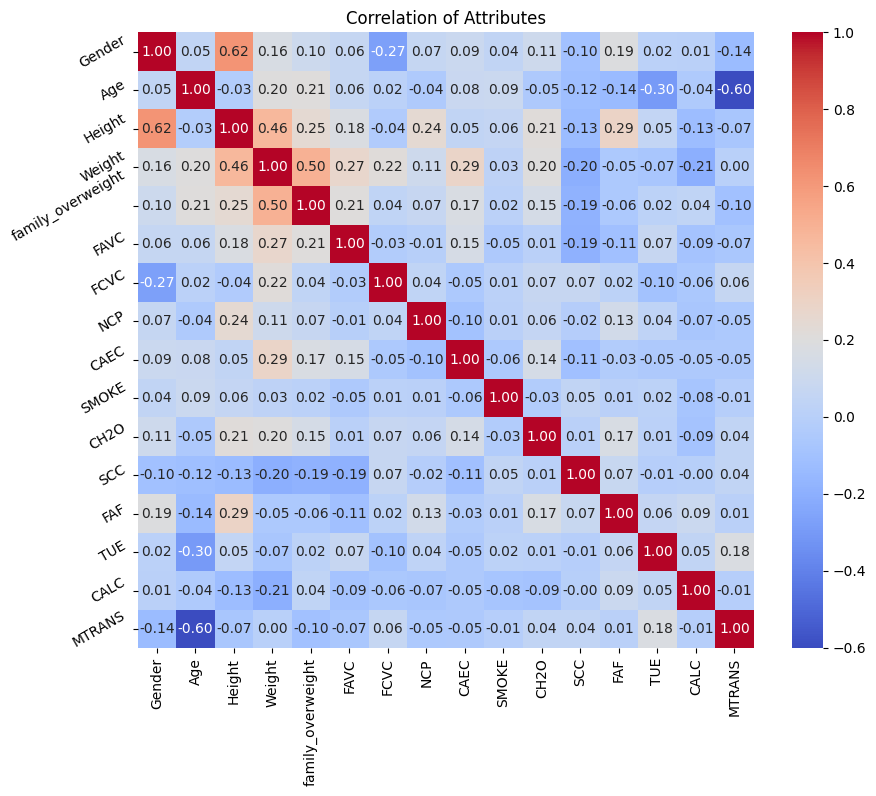

In [68]:
# Розраховуємо кореляційну матрицю та візуалізуємо її
correlation = X.corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes')
heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)
plt.show()

## Розділяємо дані на тренувальні та тестові набори і нормалізуємо числові дані

In [69]:
# Розділяємо дані на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізуємо числові дані
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Тренуємо модель KNN з 4 найближчими сусідами та передбачаємо та оцінюємо її

In [70]:

# Тренуємо модель KNN
k = 4  # Число найближчих сусідів
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Передбачаємо та оцінюємо
y_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        86
           1       0.66      0.48      0.56        93
           2       0.82      0.87      0.84       102
           3       0.89      0.97      0.93        88
           4       0.99      1.00      0.99        98
           5       0.84      0.67      0.75        88
           6       0.75      0.75      0.75        79

    accuracy                           0.82       634
   macro avg       0.81      0.81      0.81       634
weighted avg       0.81      0.82      0.81       634


Accuracy: 0.82


## Створюємо та візуалізуємо матрицю невідповідностей

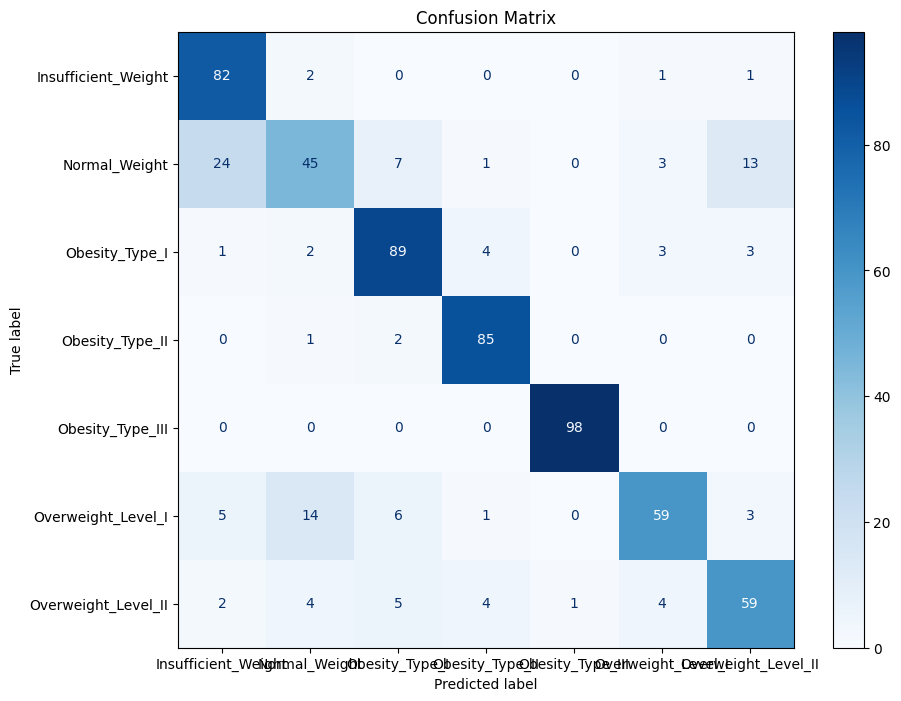

In [71]:
# Створюємо та візуалізуємо матрицю невідповідностей
fig, ax = plt.subplots(figsize=(10, 8))


ConfusionMatrixDisplay.from_predictions(y_test, 
                                      y_pred,
                                       display_labels=[label_mapping[i] for i in sorted(label_mapping.keys())],
                                      cmap=plt.cm.Blues,
                                      ax=ax)
plt.title('Confusion Matrix')
plt.show()